# Importing the libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.linear_model import LogisticRegression

# Upload the data

In [10]:
df=pd.read_csv(r'C:\Users\Magic\Downloads\breast-cancer.csv')

# Discover the data

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**This dataset contains tumor information with the following columns:**
* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius:mean of distances from center to points on the perimeter
* texture:standard deviation of gray-scale values
* perimeter
* area
* smoothness:local variation in radius lengths
* compactness:perimeter^2 / area - 1.0
* concavity:severity of concave portions of the contour
* concave points:number of concave portions of the contour
* symmetry 
* fractal dimension:"coastline approximation" - 1

In [12]:
df.shape

(569, 32)

In [13]:
df.info()
#All is well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [15]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [16]:
df.isna().sum()/len(df)
#No missing

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [17]:
df.duplicated().sum()

0

In [18]:
# general method to count outliers
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [19]:
for col in df.select_dtypes(include=np.number).columns:
    print("{:<15} {:>6}".format(col, len(count_outliers(df, col))))

id                  81
radius_mean         14
texture_mean         7
perimeter_mean      13
area_mean           25
smoothness_mean      6
compactness_mean     16
concavity_mean      18
concave points_mean     10
symmetry_mean       15
fractal_dimension_mean     15
radius_se           38
texture_se          20
perimeter_se        38
area_se             65
smoothness_se       30
compactness_se      28
concavity_se        22
concave points_se     19
symmetry_se         27
fractal_dimension_se     28
radius_worst        17
texture_worst        5
perimeter_worst     15
area_worst          35
smoothness_worst      7
compactness_worst     16
concavity_worst     12
concave points_worst      0
symmetry_worst      23
fractal_dimension_worst     24


# Data cleaning

In [20]:
df.drop('id',axis=1,inplace=True)

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Visualization

In [48]:
sns.set(style="darkgrid")

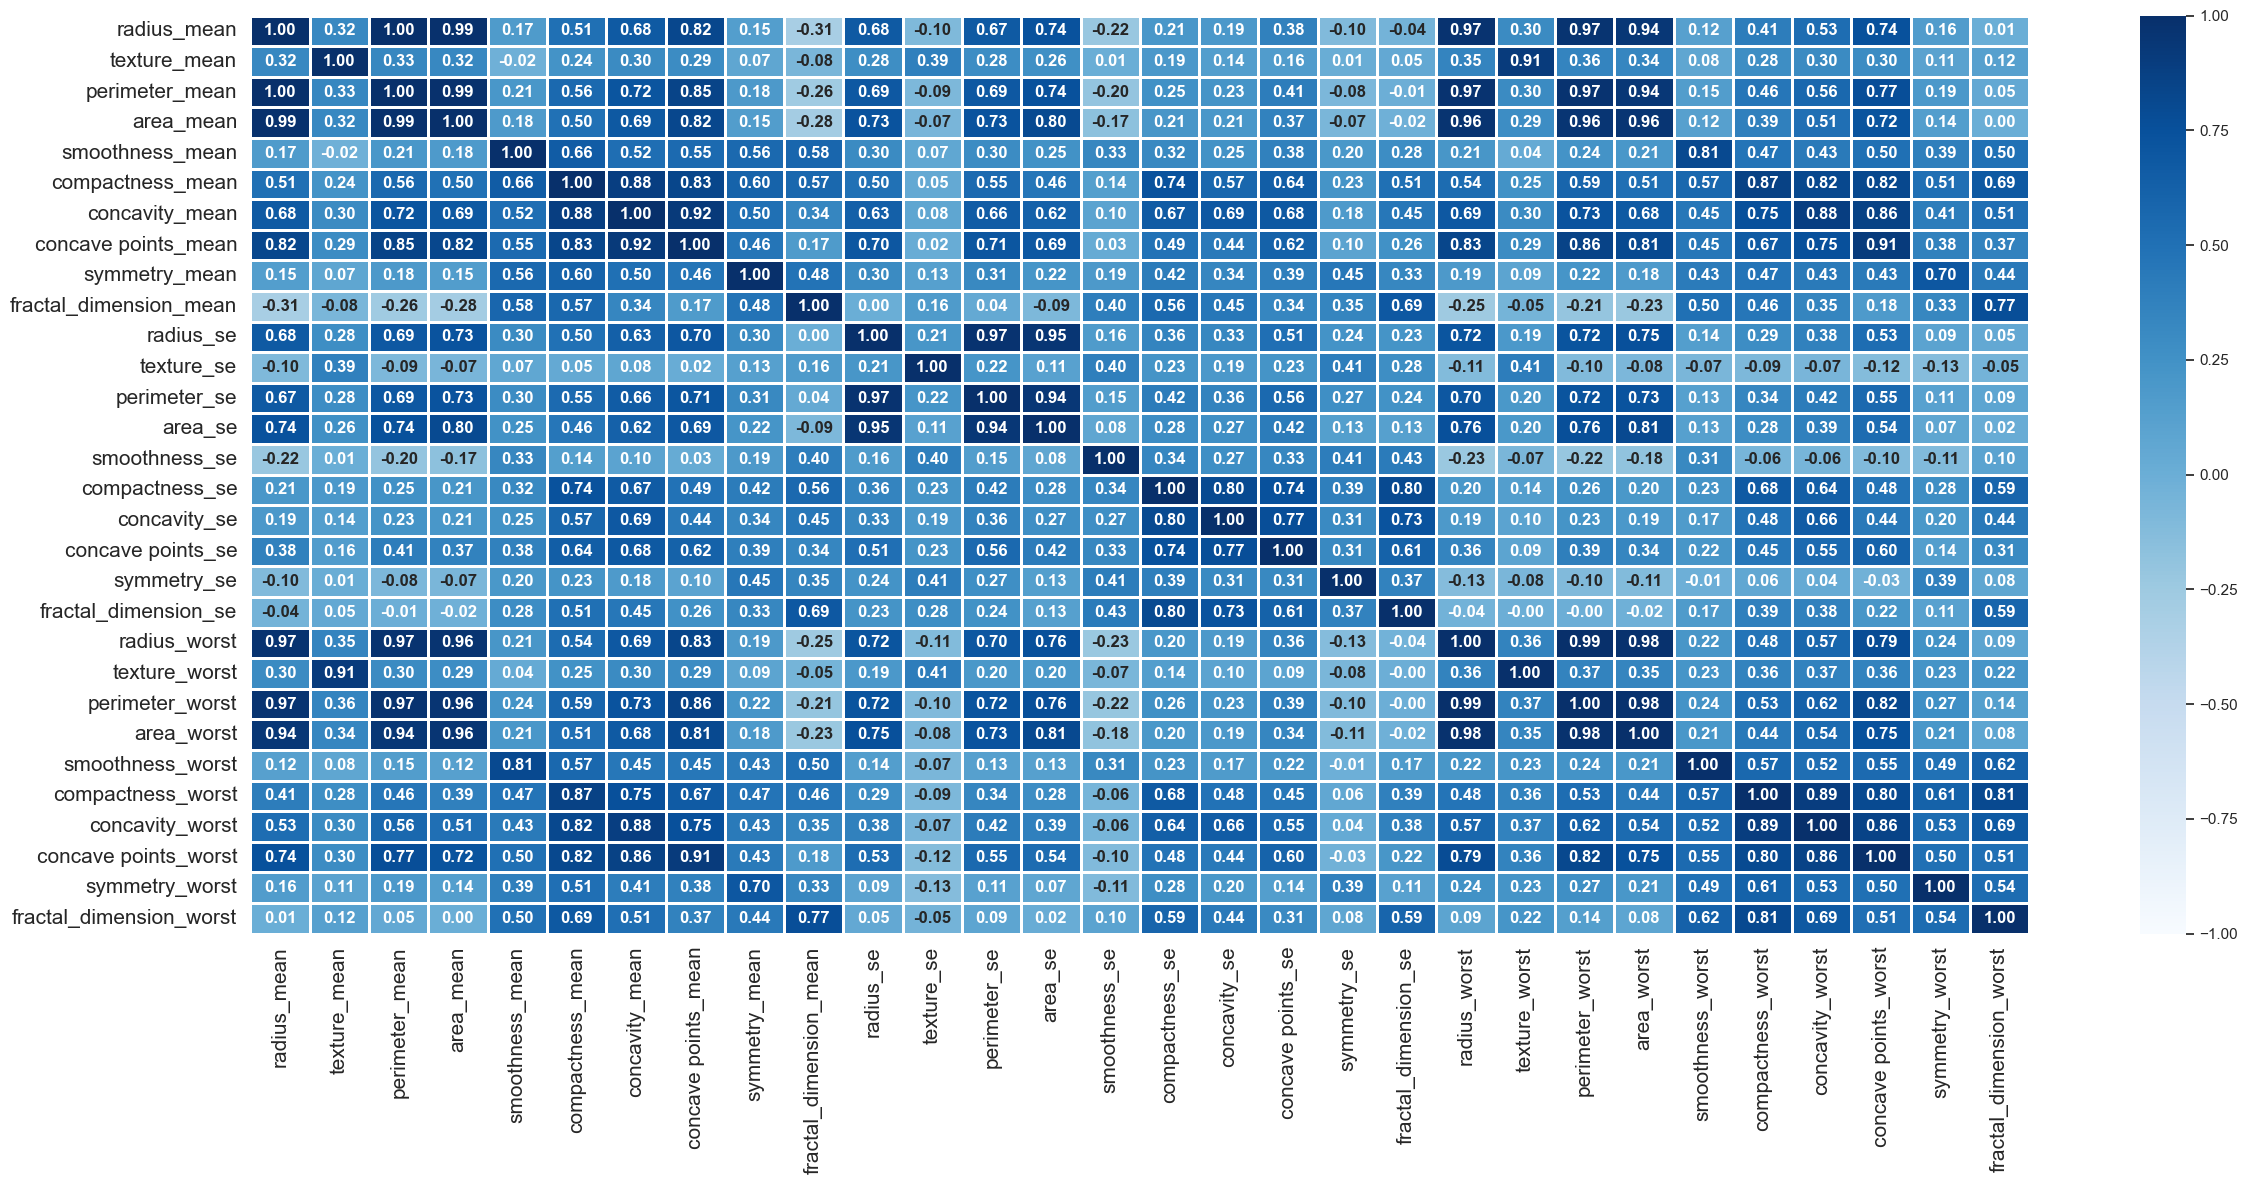

In [35]:
fig, ax = plt.subplots(figsize=(25, 12))  
sns.heatmap(df.select_dtypes(include="number").corr(),cmap='Blues',annot=True,linewidth=1,vmin=-1,vmax=1,annot_kws={'size': 12,"weight" :"bold"},ax=ax,fmt="0.2f")

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)
    
plt.tight_layout()
plt.show()

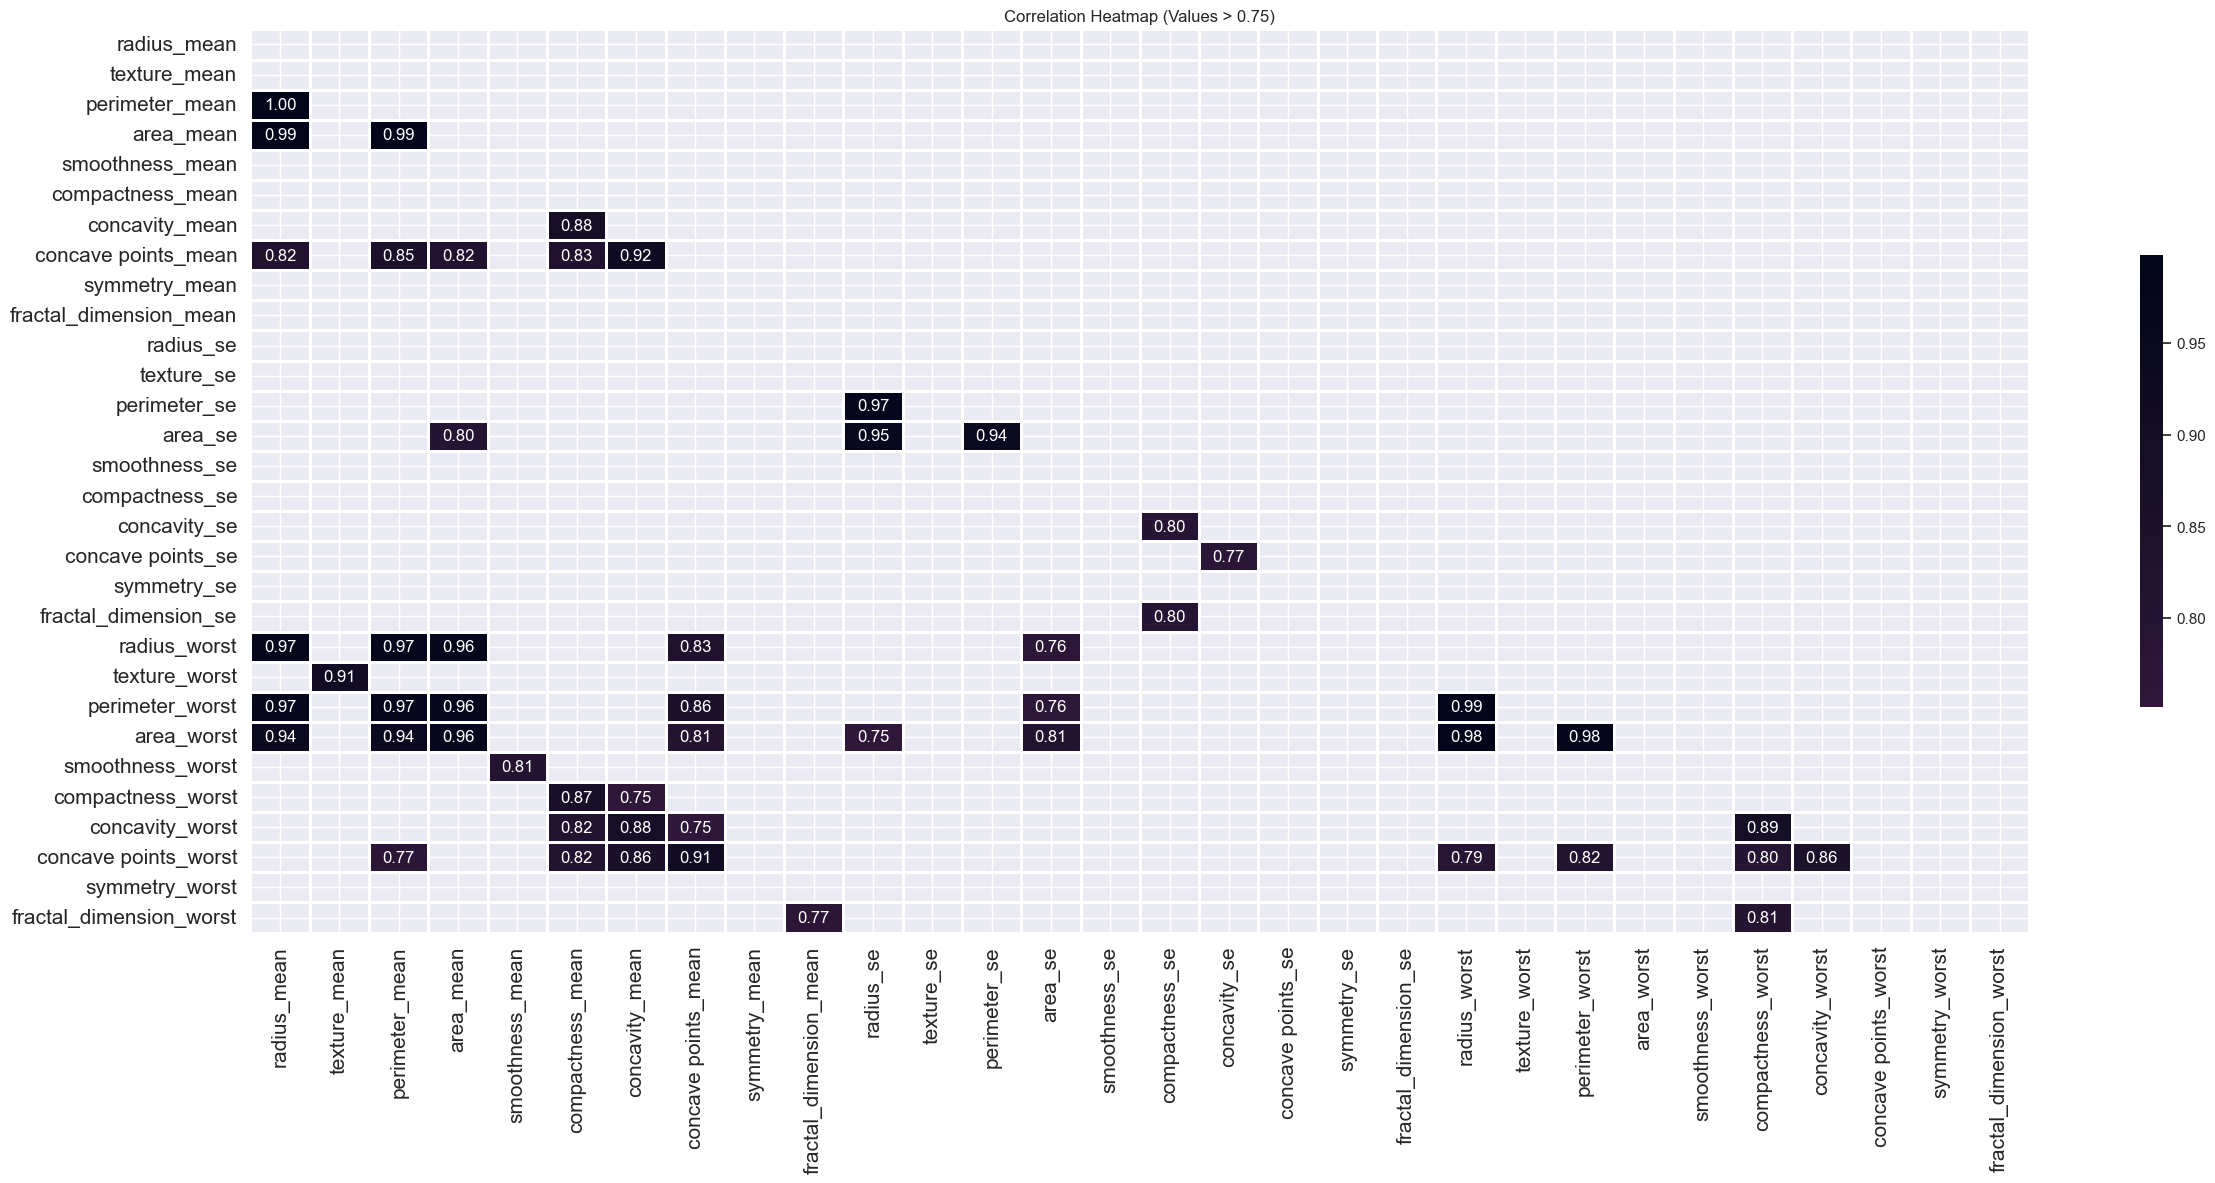

In [33]:
df_filtered = df.select_dtypes(include="number")
corr_matrix = df_filtered.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix[corr_matrix > 0.75]

plt.figure(figsize=(25, 12))
ax = sns.heatmap(filtered_corr, annot=True, fmt='.2f',
                 linewidths=1, linecolor='white', cmap='rocket_r',cbar_kws={"shrink": .5}, mask=mask, center=0)

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)
    
plt.title("Correlation Heatmap (Values > 0.75)")
plt.tight_layout()

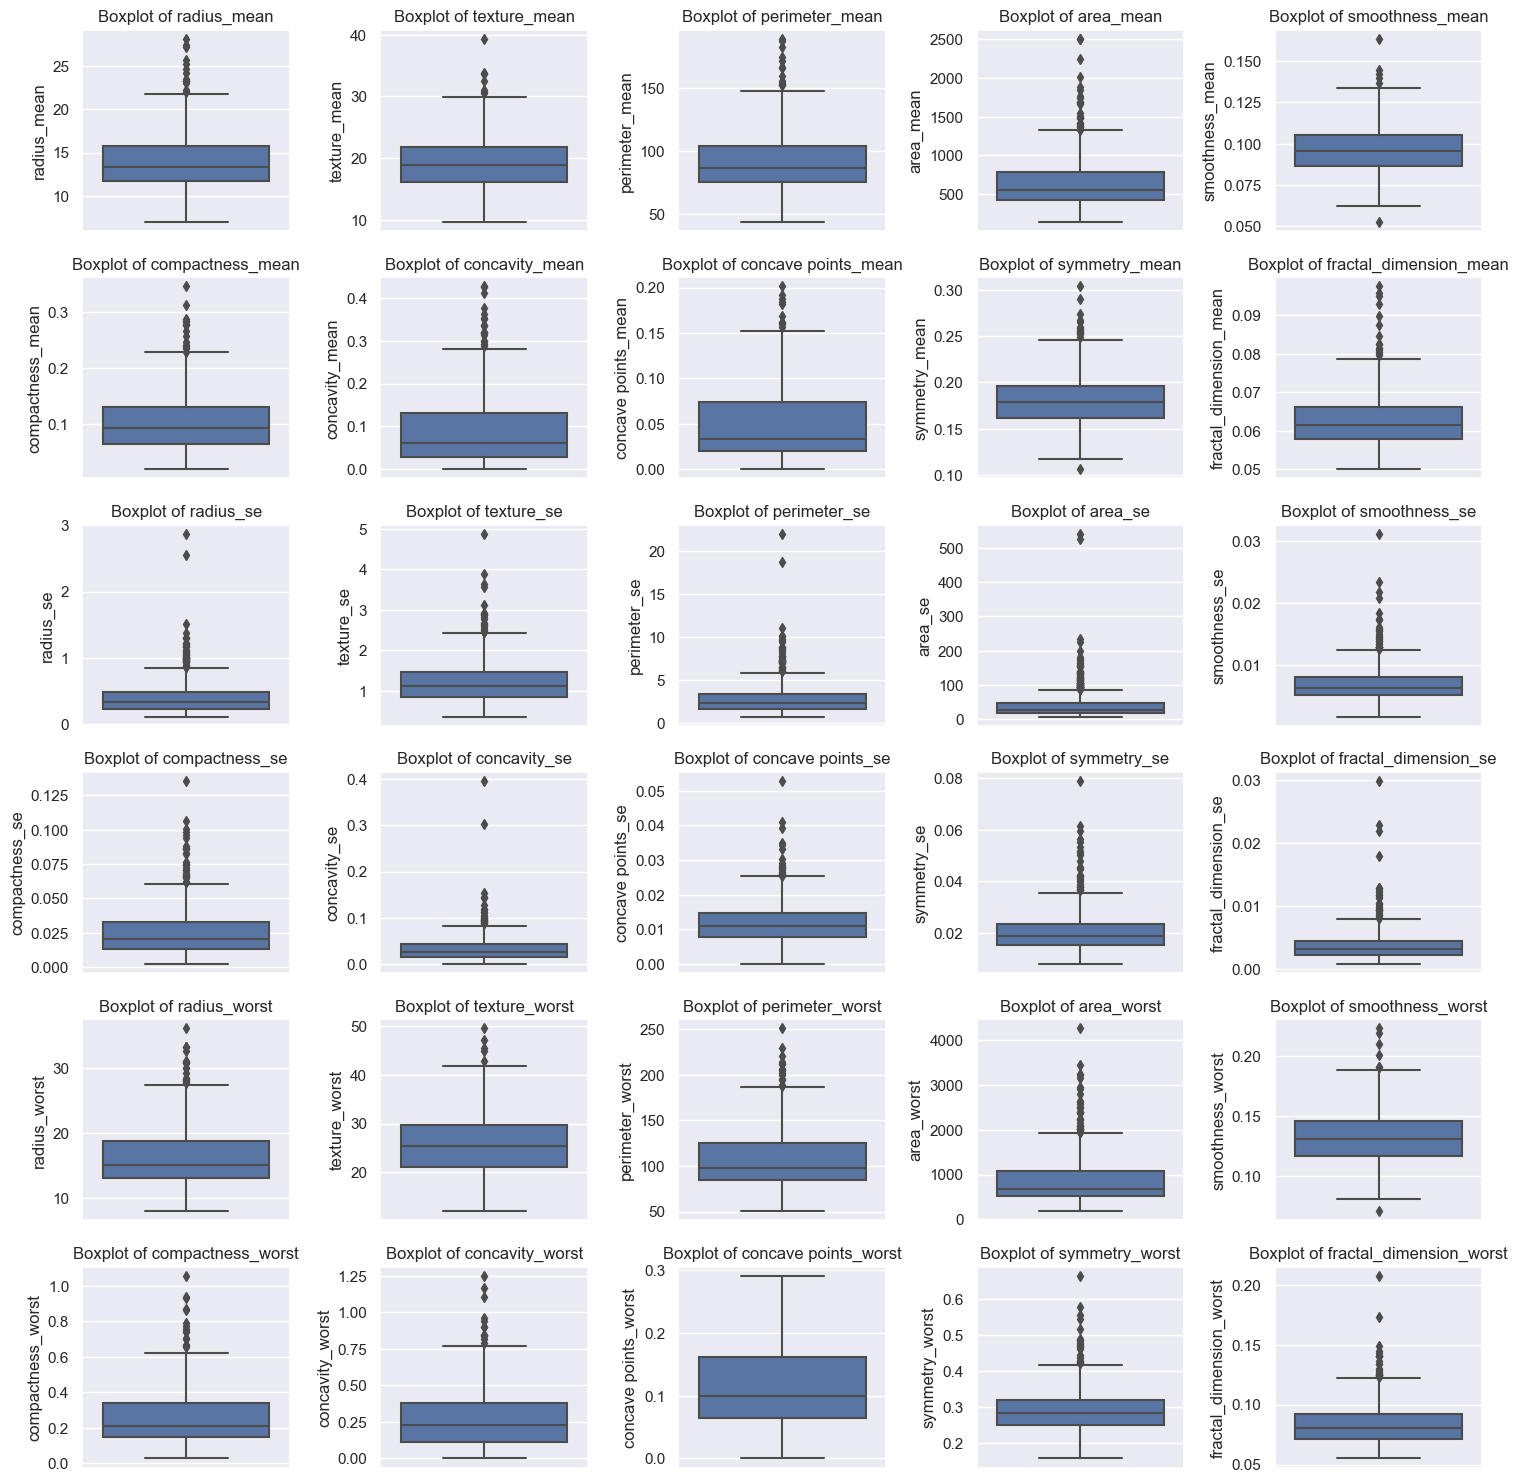

In [36]:
num_cols=df.select_dtypes(include=('int','float')).columns.to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
# Flatten axes if necessary
axes = axes.flatten()
# Plot each rating on a subplot with smooth visuals
for i in range(len(num_cols)):
    sns.boxplot(y=num_cols[i], data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {num_cols[i]}', fontsize=12)
plt.tight_layout()    
plt.show()
#there are outliers in most columns

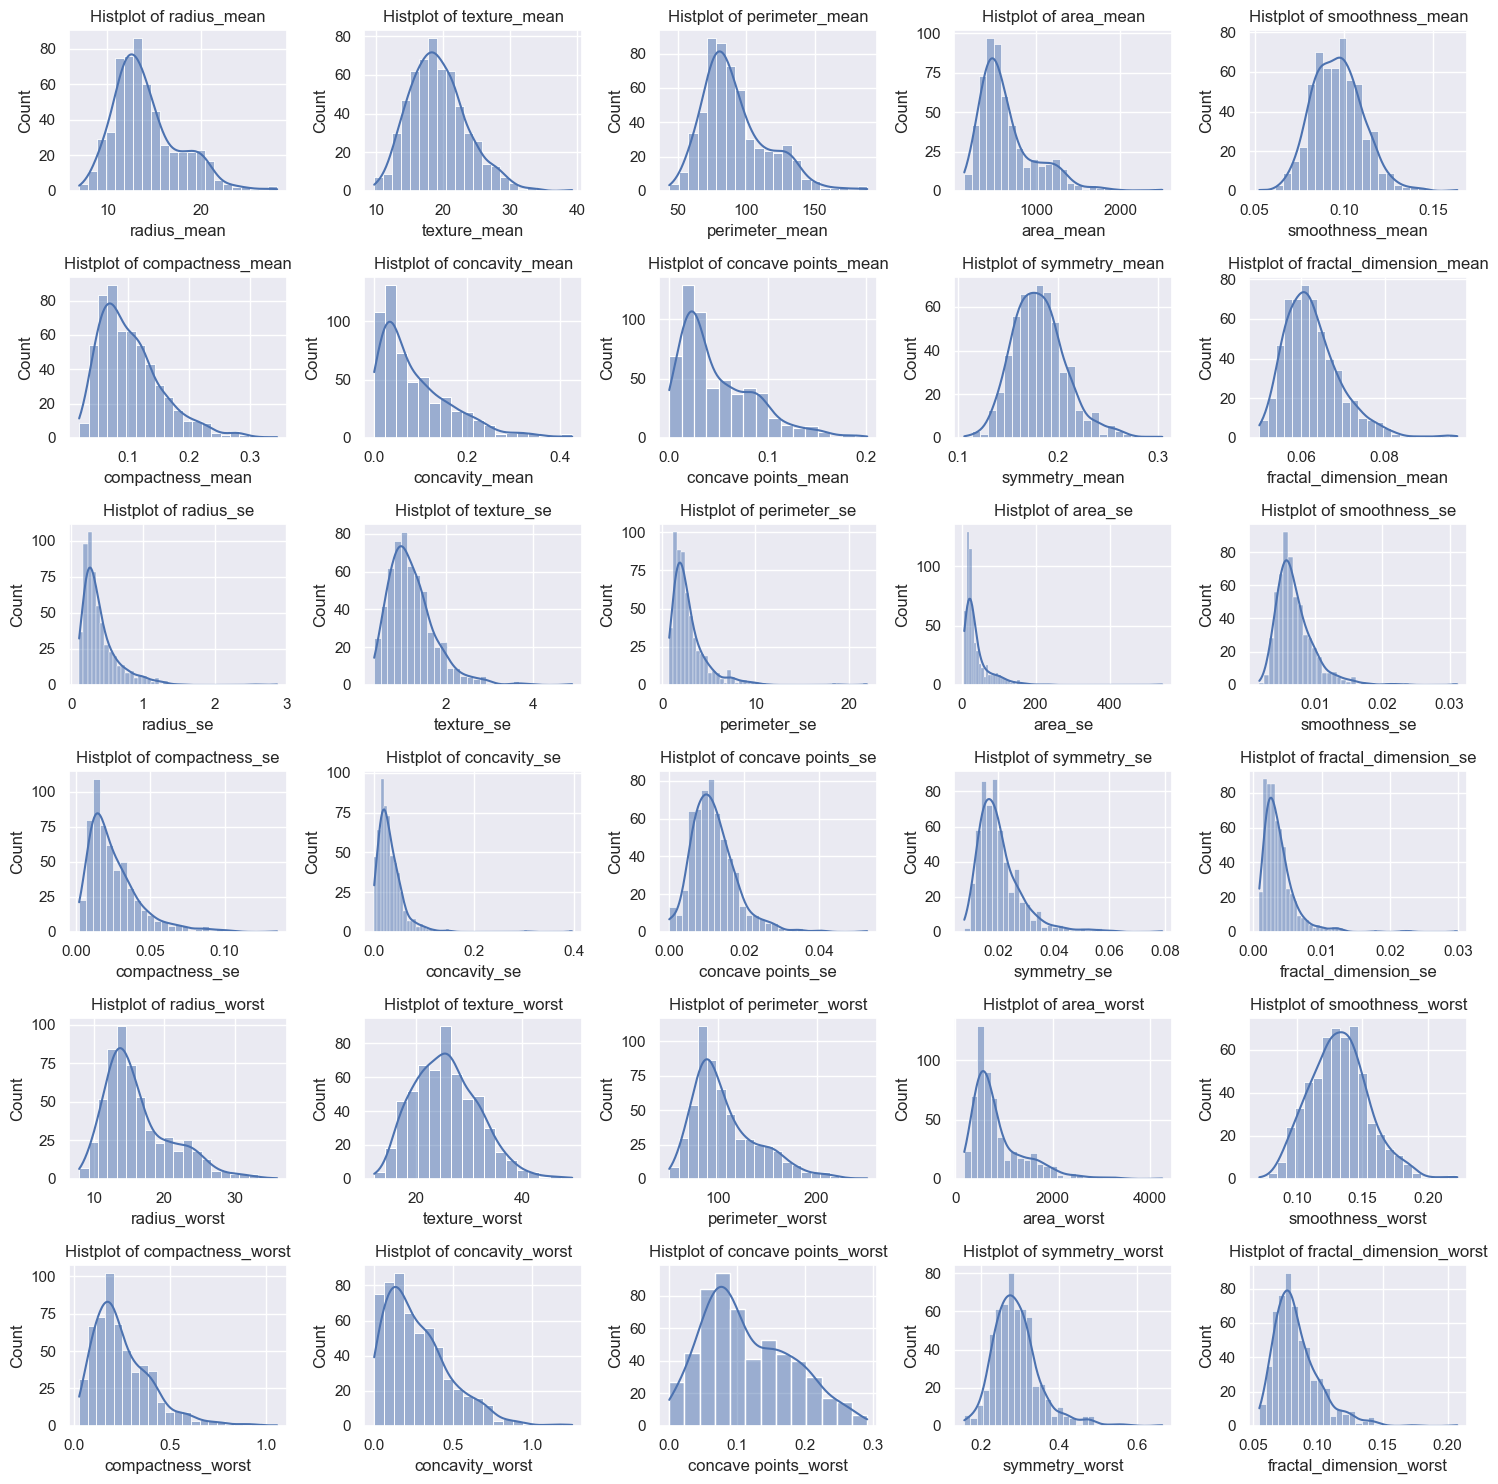

In [37]:
num_cols=df.select_dtypes(include=('int','float')).columns.to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
# Flatten axes if necessary
axes = axes.flatten()
# Plot each rating on a subplot with smooth visuals
for i in range(len(num_cols)):
    sns.histplot(x=num_cols[i], data=df,kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot of {num_cols[i]}', fontsize=12)
plt.tight_layout()
plt.show()
#many of them are positive skewed

In [39]:
df.replace({'M':'1','B':'0'},inplace=True)

In [40]:
#Handling the outliers using log10 tranformation technique
in_array=df.drop('diagnosis', axis=1)
out_array=np.log1p(in_array)
print(out_array)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       2.943913      2.431857        4.818667   6.909753         0.111899   
1       3.071303      2.932260        4.897093   7.190676         0.081340   
2       3.029650      3.102342        4.875197   7.093405         0.104000   
3       2.519308      3.062456        4.364117   5.958683         0.133219   
4       3.058237      2.730464        4.913390   7.168580         0.095583   
..           ...           ...             ...        ...              ...   
564     3.116178      3.152309        4.962845   7.299797         0.105261   
565     3.050694      3.375880        4.884316   7.140453         0.093308   
566     2.867899      3.370051        4.694096   6.755885         0.081165   
567     3.072693      3.412137        4.949469   7.143618         0.111362   
568     2.170196      3.240246        3.890186   5.204007         0.051292   

     compactness_mean  concavity_mean  concave points_mean  sym

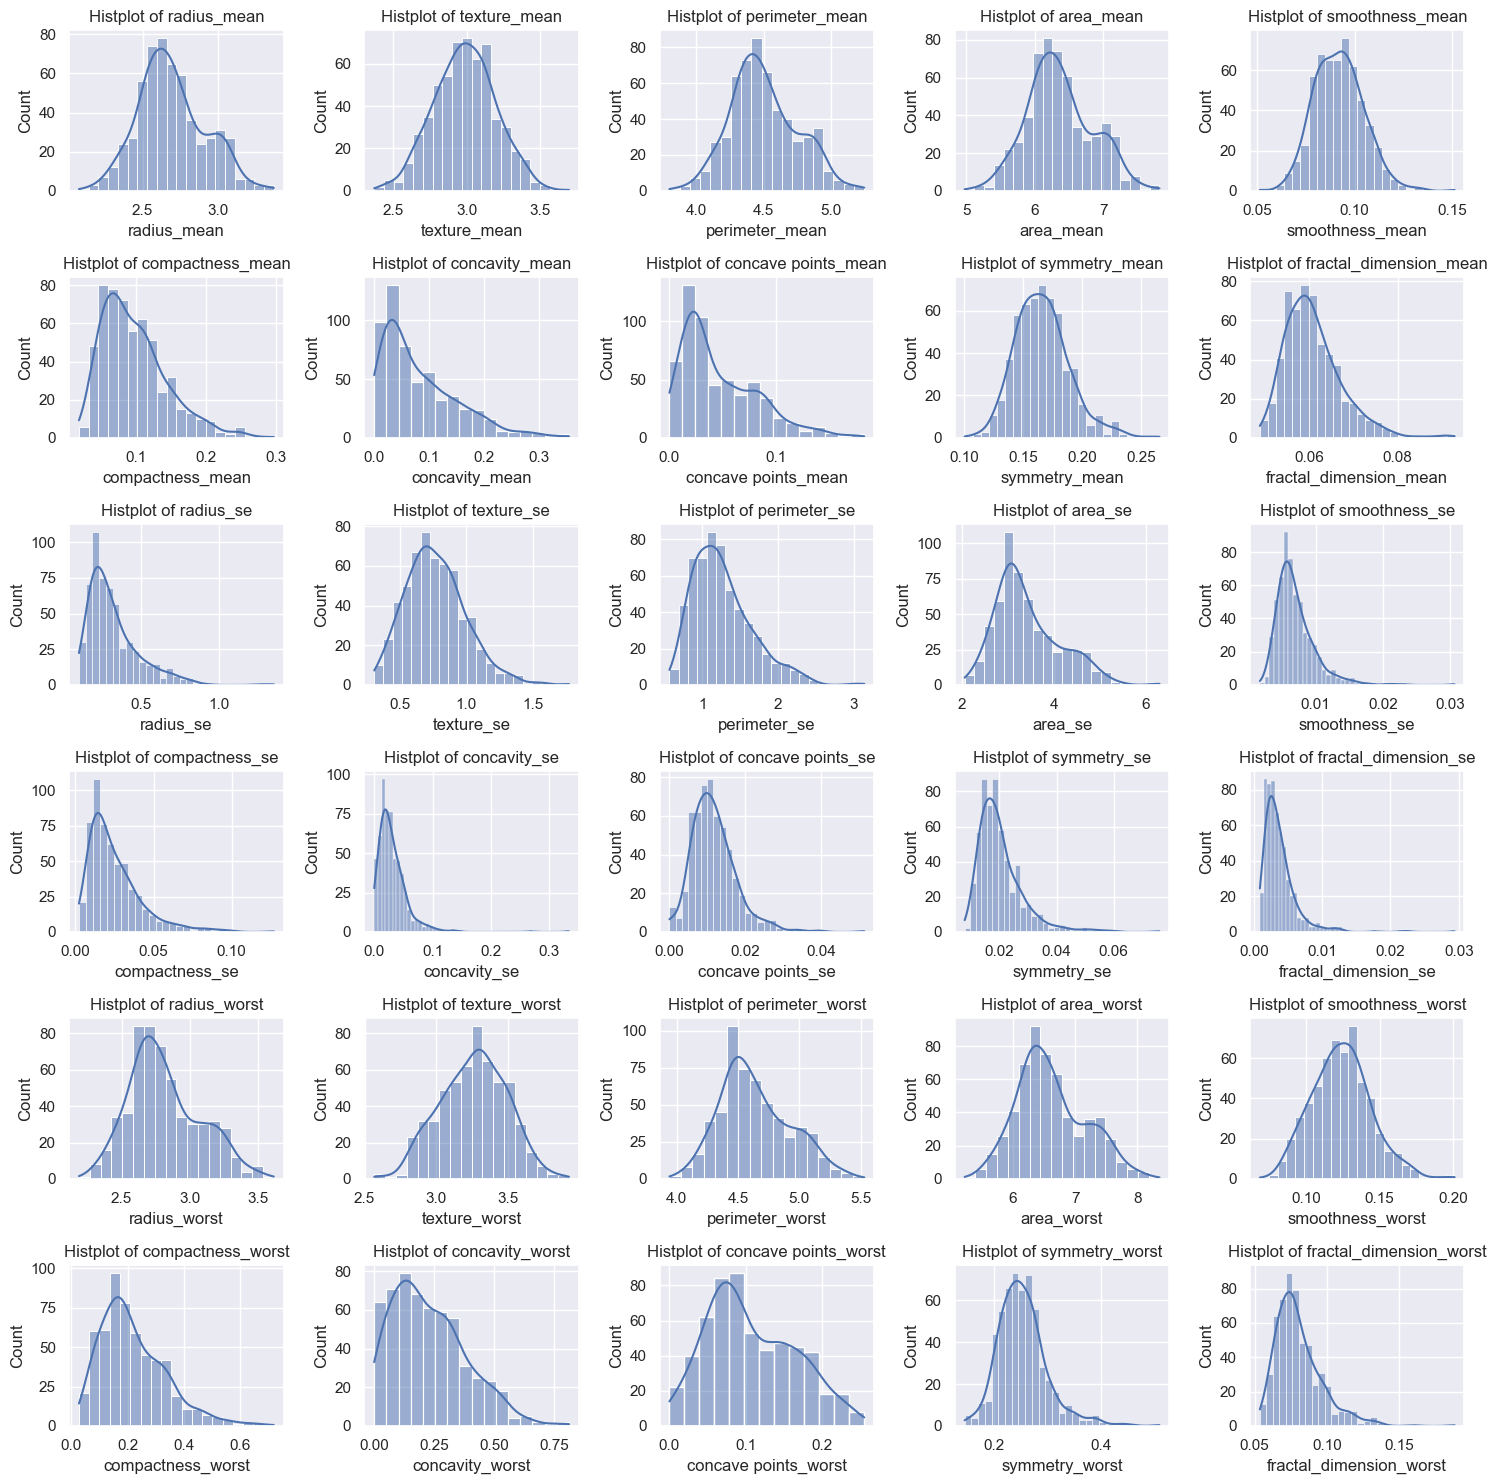

In [41]:
num_cols=out_array.select_dtypes(include=('int','float')).columns.to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
# Flatten axes if necessary
axes = axes.flatten()
# Plot each rating on a subplot with smooth visuals
for i in range(len(num_cols)):
    sns.histplot(x=num_cols[i], data=out_array,kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot of {num_cols[i]}', fontsize=12)    
plt.tight_layout()
plt.show()
# now it is normally distributed ,all is well

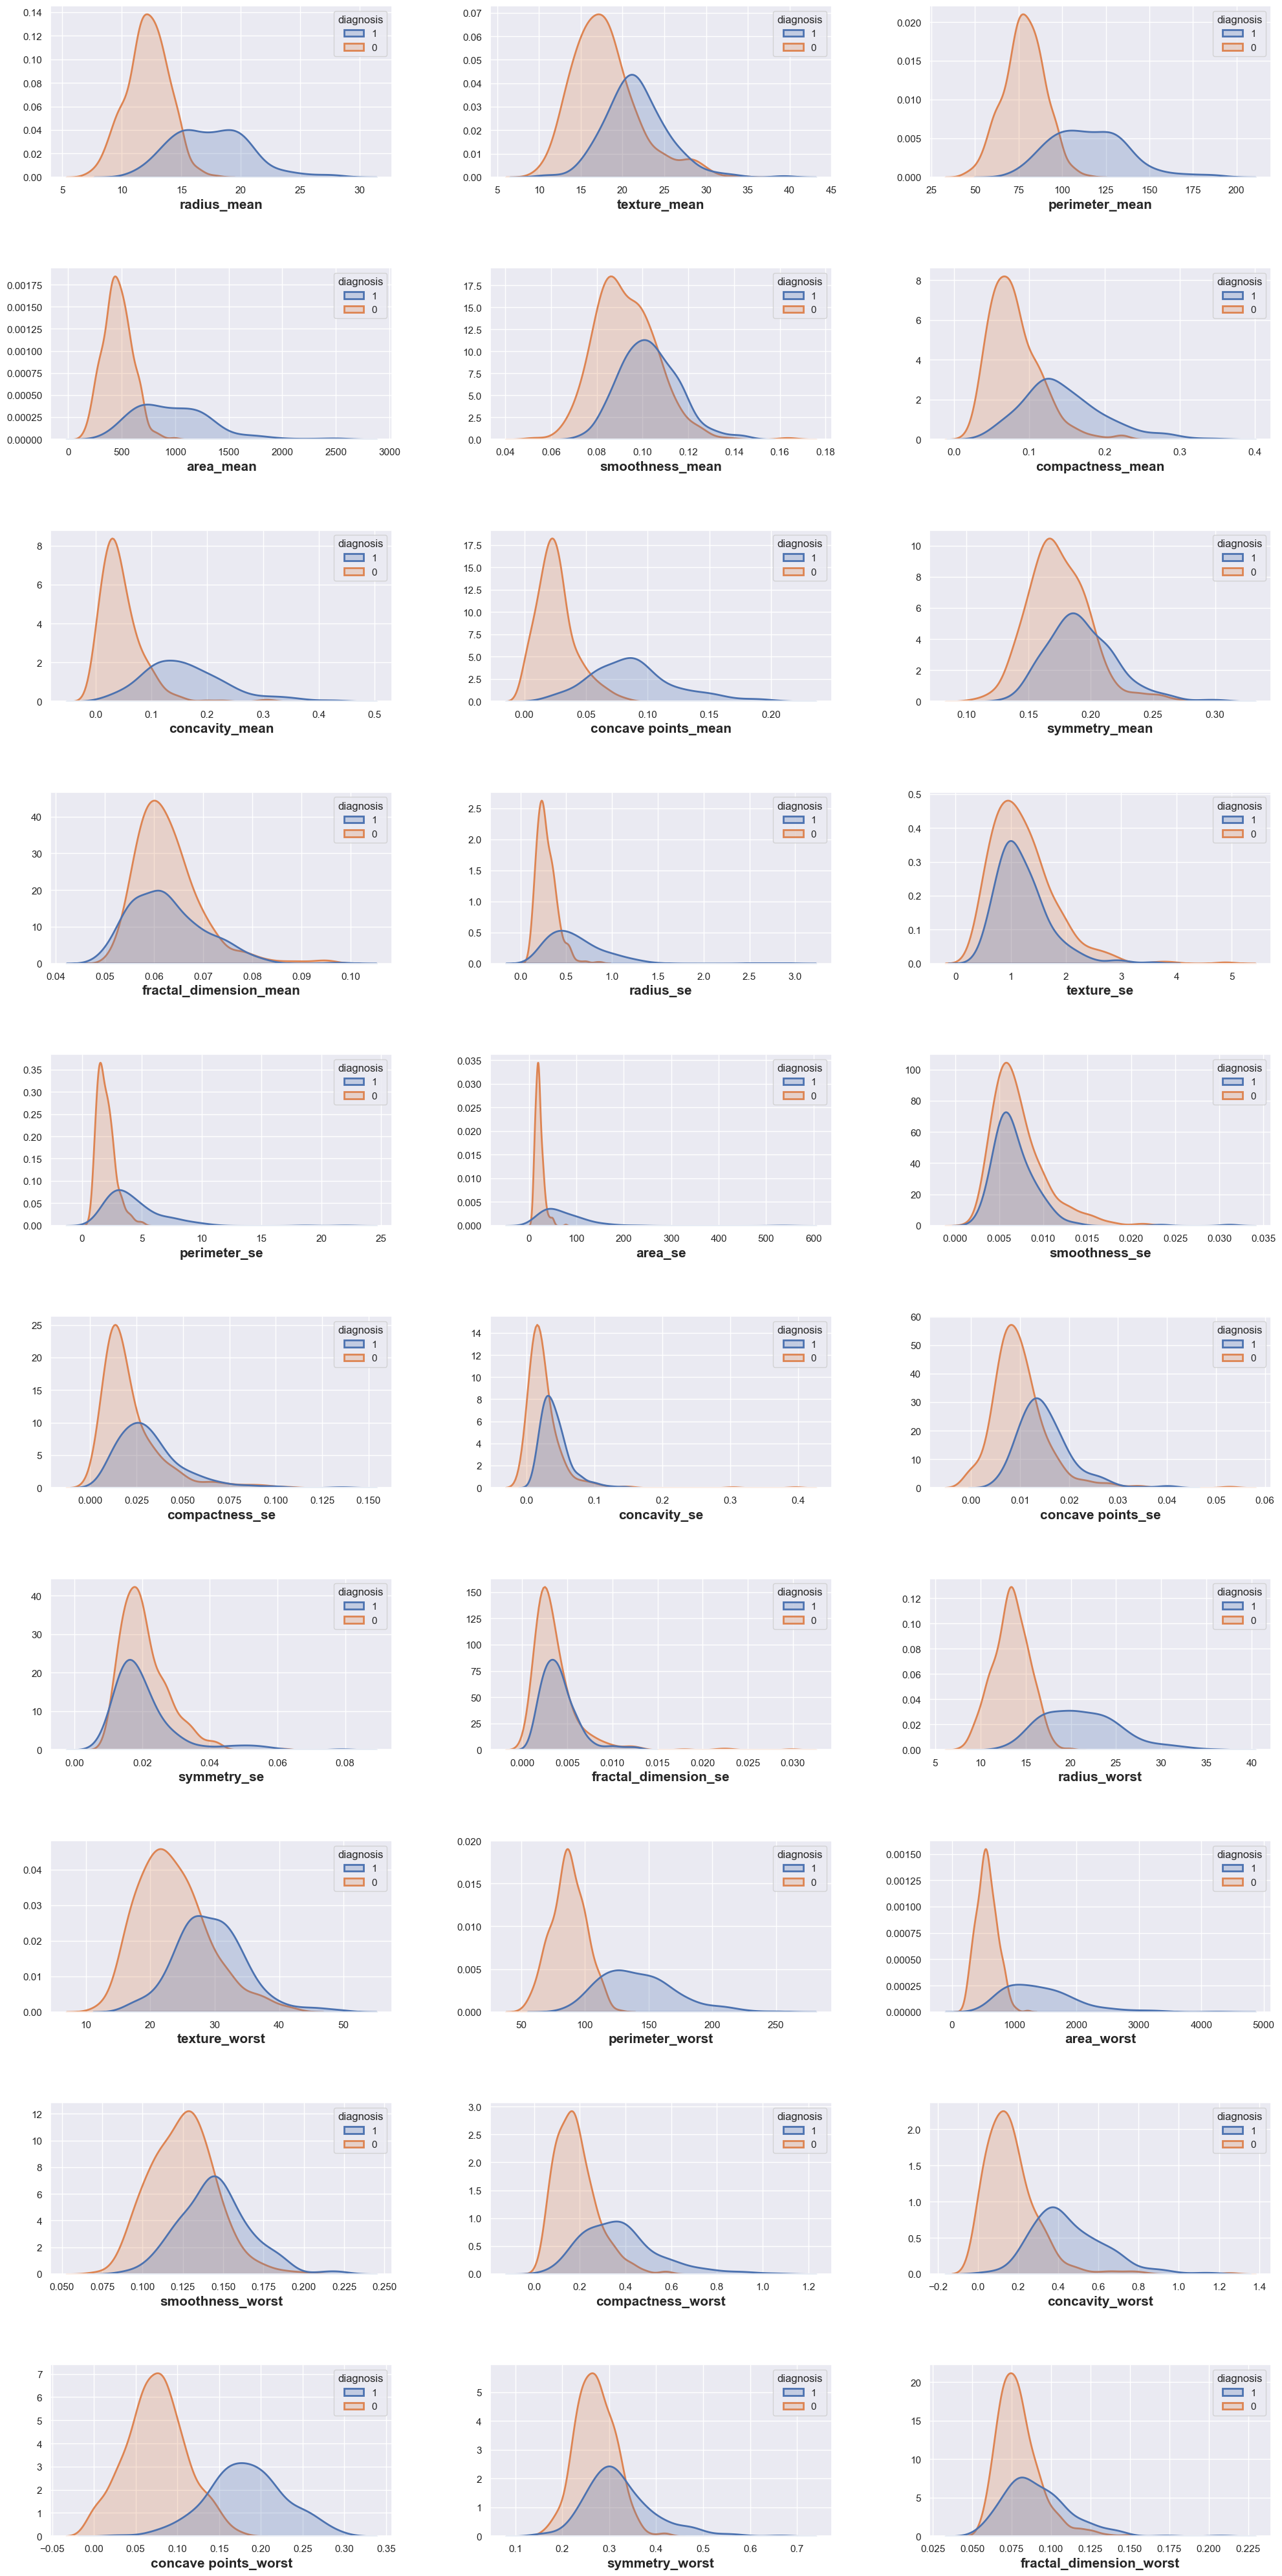

In [53]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue ='diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
#we notice when the radius and concavity_mean is bigger the tumer tends to be malignant and so on..

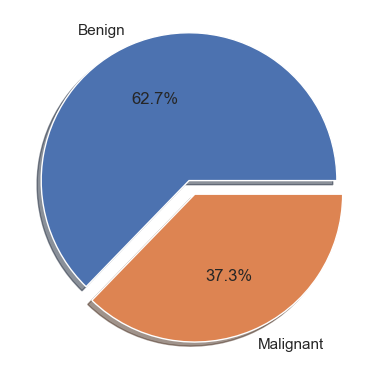

In [47]:
plt.pie(df["diagnosis"].value_counts(),labels=['Benign','Malignant'],shadow=True,autopct='%1.1f%%',explode=[0.1,0])
plt.show()
#most tumers are benign

# KNN model

In [54]:
X =out_array
y = df['diagnosis']
#X =df.drop('diagnosis', axis=1)

In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [56]:
# Feature scaling (standardizing the data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [58]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

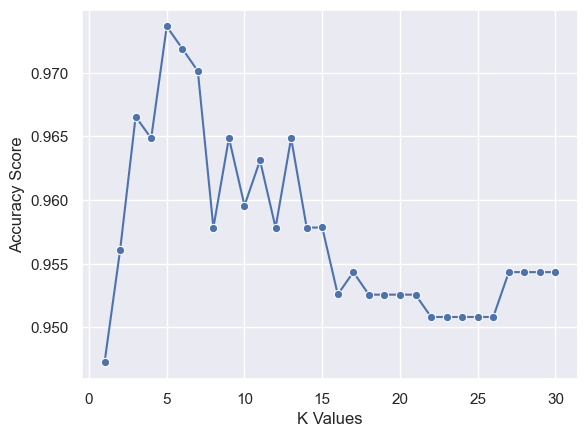

In [59]:
#We can plot the results for different values of k
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
#the best value for k is 6 ,7 we can choose 6

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
training_accuracy=knn.score(X_train,y_train)
test_accuracy=knn.score(X_test,y_test)

In [62]:
print(training_accuracy)
print(test_accuracy)

0.9802197802197802
0.9649122807017544


In [64]:
# Evaluate the model
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{knn_accuracy:0.3f}")
print(f"\nclassification report:{classification_report(y_test, y_pred)}")    

Accuracy:0.965

classification report:              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [65]:
print(confusion_matrix(y_test, y_pred))

[[69  2]
 [ 2 41]]


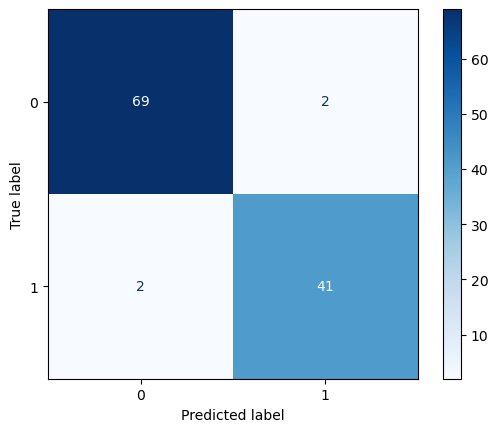

In [70]:
plt.style.use('default')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
#the FP is only 2 so that is  somewhat good 

# Logistic Regression model

In [71]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [72]:
# Evaluate the model
pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test, pred)
print(f"Accuracy:{lg_accuracy:0.3f}")
print(f"\nclassification report:{classification_report(y_test, pred)}") 
#accuracy of logistic regression is 98.2%  is better compared to the knn which is 96.5%

Accuracy:0.982

classification report:              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [74]:
print(confusion_matrix(y_test, pred))

[[70  1]
 [ 1 42]]


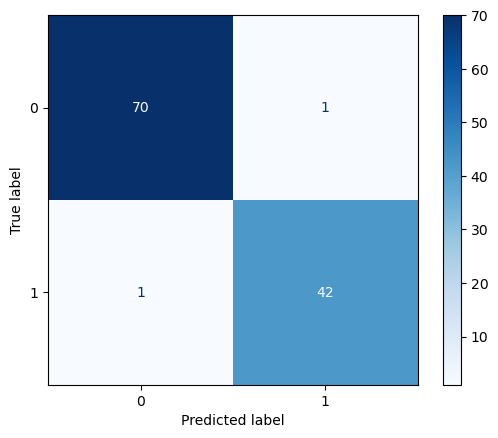

In [75]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,pred)).plot(cmap=plt.cm.Blues)
#the FP is only 1 so that is good 

In [ ]:
df.to_csv('Breast_cancer.csv')